In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_dir = '/content/drive/MyDrive/DAY1 PYTHON/Plant Disease'
categories = os.listdir(data_dir)

images = []
labels = []

for category in categories:
  folder_path = os.path.join(data_dir,category)
  for img_file in os.listdir(folder_path):
    img_path = os.path.join(folder_path,img_file)
    img = cv2.imread(img_path)
    if img is not None:
      img = cv2.resize(img,(64,64))
      images.append(img)
      labels.append(category)
X = np.array(images)
y = np.array(labels)

print("Labels:",np.unique(y))
print("X shape:",X.shape)
print("y shape:",y.shape)



Labels: ['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy']
X shape: (1710, 64, 64, 3)
y shape: (1710,)


Class Distribution:
Pepper__bell___healthy           970
Potato___Early_blight            228
Potato___Late_blight             210
Potato___healthy                 152
Pepper__bell___Bacterial_spot    150
Name: count, dtype: int64


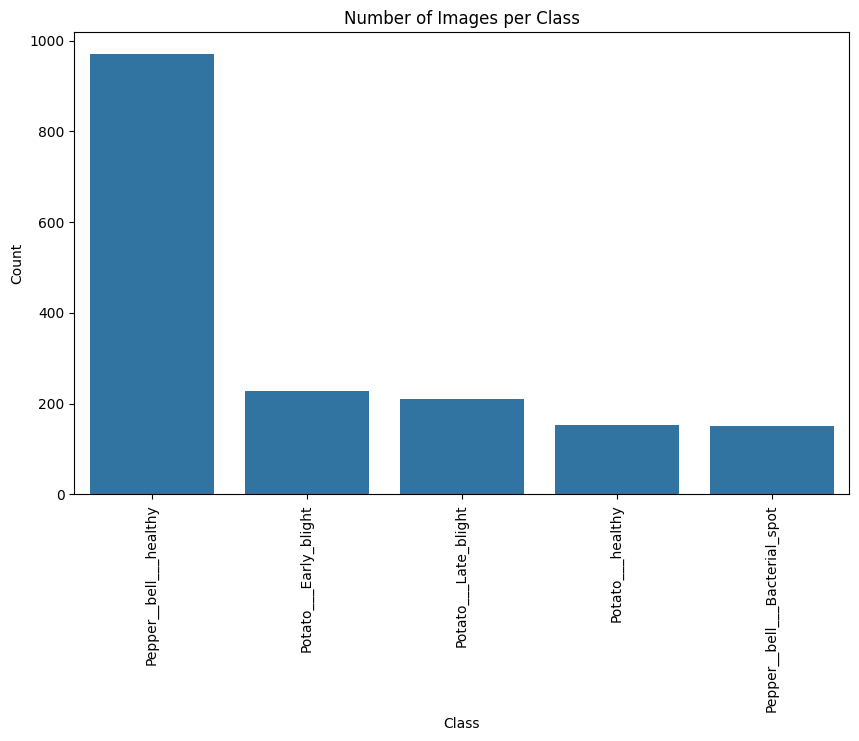

In [ ]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index,y=class_counts.values)
plt.xticks(rotation=90)
plt.title("Number of Images per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [ ]:
valid_images = []
valid_labels = []

for img,label in zip(X,y):
  if img.shape == (64,64,3):
    valid_images.append(img)
    valid_labels.append(label)

X = np.array(valid_images)
y = np.array(valid_labels)

print("Cleaned Data shape:", X.shape)


Cleaned Data shape: (1710, 64, 64, 3)


In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

class_names = le.classes_

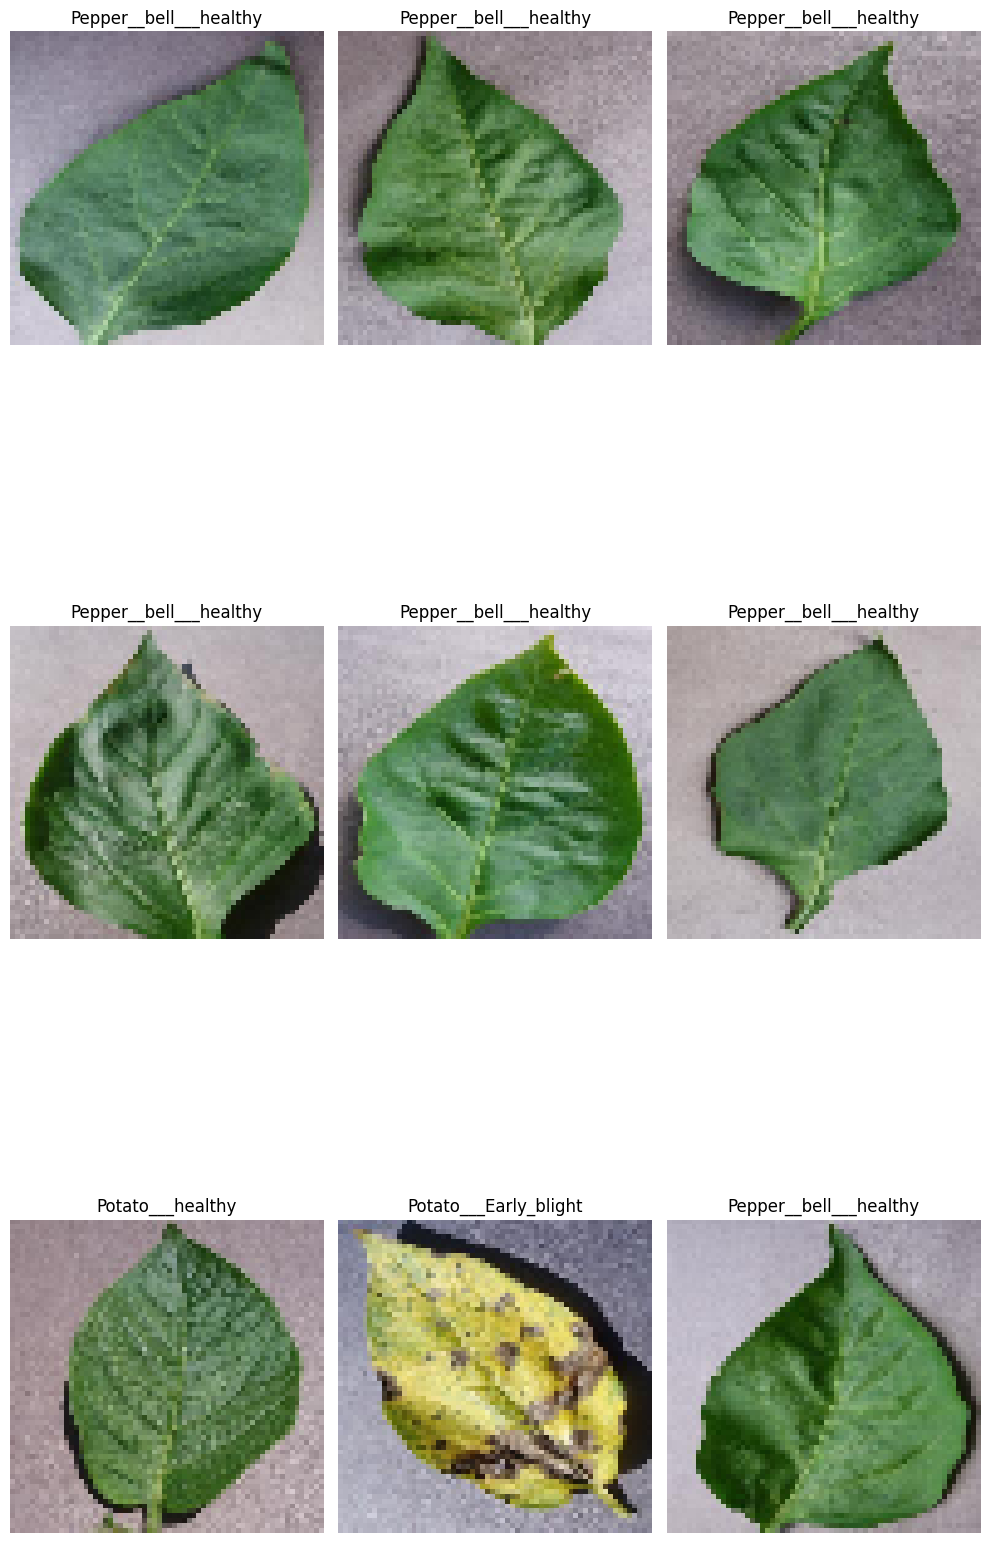

In [ ]:
import random

plt.figure(figsize=(10,20))
for i in range(9):
  idx = random.randint(0,len(X))
  plt.subplot(3,3,i+1)
  plt.imshow(cv2.cvtColor(X[idx],cv2.COLOR_BGR2RGB))
  plt.title(class_names[y_encoded[idx]])
  plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
def extract_color_histogram(image,bins=(8,8,8)):
 image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
 hist = cv2.calcHist([image],[0,1,2],None,bins,[0,256,0,256,0,256])
 hist = cv2.normalize(hist,hist).flatten()
 return hist

hist_features = [extract_color_histogram(img)for img in X]
X_features = np.array(hist_features)


In [ ]:
model = LogisticRegression(max_iter=1000)
model = SVC(kernel='rbf',C=10,gamma='scale')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y_encoded,test_size=0.2,random_state=42)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9298245614035088
F1 Score: 0.9289792973602417


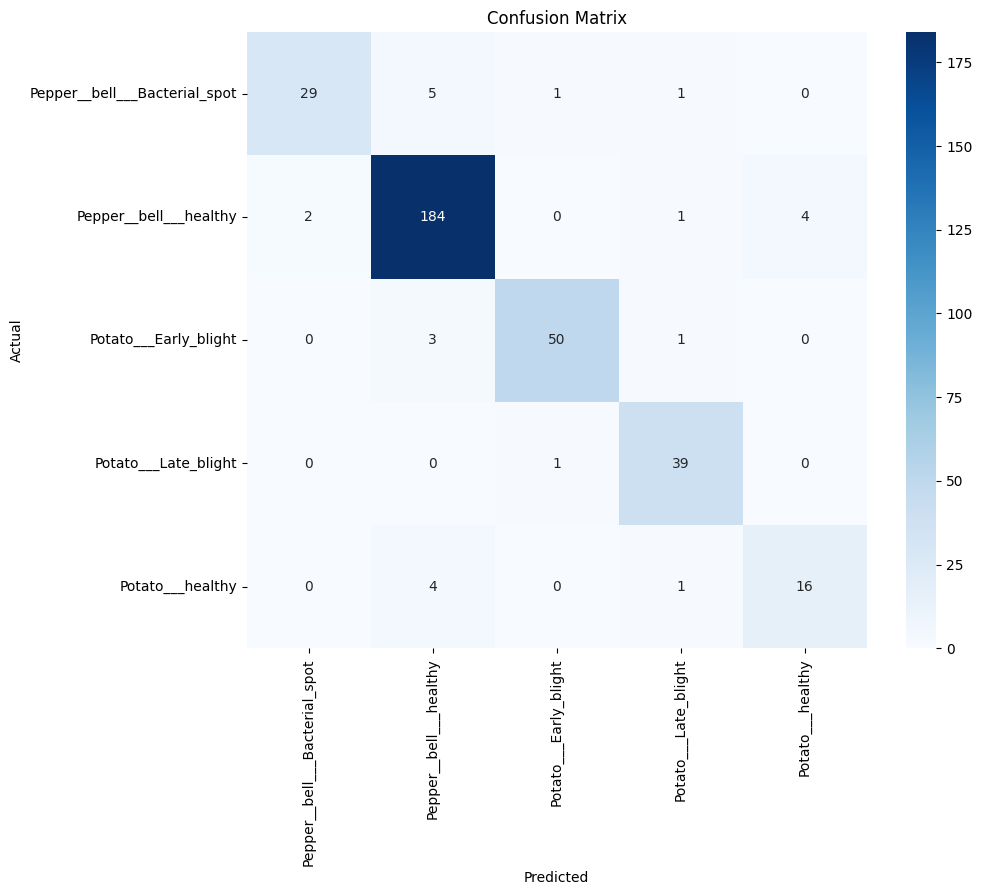

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

acc = accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

f1 = f1_score(y_test,y_pred, average = 'weighted')
print("F1 Score:",f1)

cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Classification Report
print("Classification Report:")
print(classification_report(y_test,y_pred,target_names=class_names))

Classification Report:
                               precision    recall  f1-score   support

Pepper__bell___Bacterial_spot       0.94      0.81      0.87        36
       Pepper__bell___healthy       0.94      0.96      0.95       191
        Potato___Early_blight       0.96      0.93      0.94        54
         Potato___Late_blight       0.91      0.97      0.94        40
             Potato___healthy       0.80      0.76      0.78        21

                     accuracy                           0.93       342
                    macro avg       0.91      0.89      0.90       342
                 weighted avg       0.93      0.93      0.93       342

